<a href="https://colab.research.google.com/github/dqminhv/fellowship_ai-nlp-challenge/blob/main/notebook/nlp-challenge-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Packages & Load Data

In [1]:
#Ignore warnings in Google Colab
import warnings
# Ignore all warnings (not recommended in general)
warnings.filterwarnings("ignore")

In [2]:
#Mount Google Drive to access the IMDB Review file
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re

In [4]:
#Load csv file to a pandas DataFrame
file_path = '/content/gdrive/MyDrive/Document/Data Science/Skills Development/fellowshipai/imdb-dataset.csv'
imdb_db = pd.read_csv(file_path)

In [5]:
#Check for data type and missing values
imdb_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
#Look at the first few records of the dataset
imdb_db.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Data Cleaning

In [7]:
#Create a text cleaning function to clean and lemmatize the review feature
def clean_text(text):
    """
    Cleans text that is suitable for TF-IDF analysis.
    Args:
    text: A string containing the text to be cleaned.
    Returns:
    A cleaned string suitable for TF-IDF analysis.
    """
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'[^\s]+@.*?\s+', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove underscores
    text = re.sub(r'_', '', text)
    # Remove single characters
    text = re.sub(r'\s+', ' ', text)
    # Remove multiple spaces
    text = text.strip()
    # Convert to lowercase
    return text.lower()

In [8]:
#Clean the contents of the review feature
imdb_db['review'] = imdb_db['review'].apply(clean_text)

In [9]:
imdb_db['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production br br the filmin...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object

# Exploratory Data Analysis

## Sentiment Labels Distribution

In [10]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', imdb_db['sentiment'].value_counts())

# Find the percentage of positive and negative reviews
print('Percentage of positive and negative reviews: ', imdb_db['sentiment'].value_counts() / len(imdb_db) * 100)

Number of positive and negative reviews:  sentiment
positive    25000
negative    25000
Name: count, dtype: int64
Percentage of positive and negative reviews:  sentiment
positive    50.0
negative    50.0
Name: count, dtype: float64


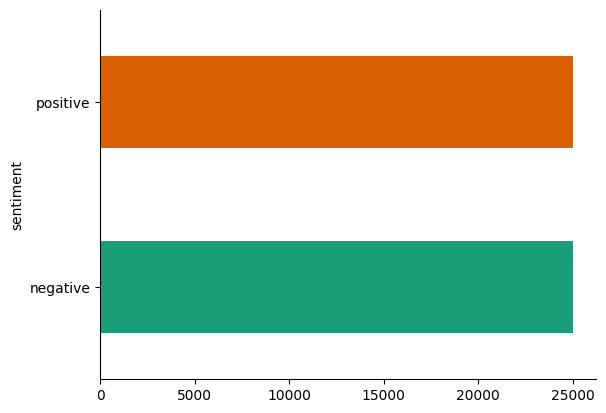

In [11]:
#Plot barchart for positive and negative sentiment reviews
imdb_db.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Analyzing Reviews Length




In [12]:
#Create a review_length column
imdb_db['review_length'] = imdb_db['review'].str.len()

In [13]:
#Descriptive statistics for review_length
imdb_db['review_length'].describe()

count    50000.000000
mean      1251.497380
std        947.107557
min         30.000000
25%        669.000000
50%        927.000000
75%       1519.000000
max      13321.000000
Name: review_length, dtype: float64

In [14]:
#Descriptive statistics for positive review_length
imdb_db[imdb_db['sentiment'] == 'positive']['review_length'].describe()

count    25000.000000
mean      1267.913760
std        988.368517
min         63.000000
25%        663.000000
50%        926.000000
75%       1544.000000
max      13321.000000
Name: review_length, dtype: float64

In [15]:
#Descriptive statistics for negative review_length
imdb_db[imdb_db['sentiment'] == 'negative']['review_length'].describe()

count    25000.000000
mean      1235.081000
std        903.686887
min         30.000000
25%        675.000000
50%        928.000000
75%       1493.250000
max       8495.000000
Name: review_length, dtype: float64

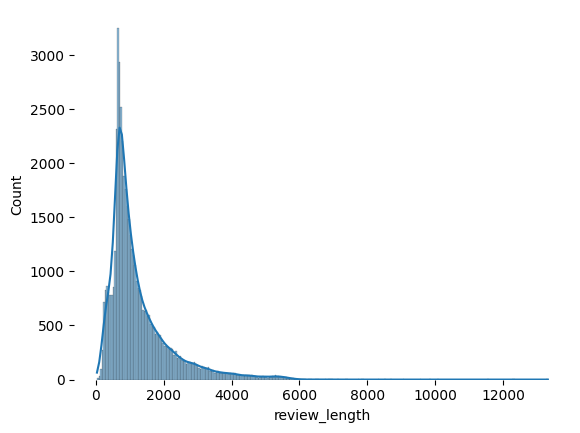

In [16]:
#Plot the distribution of review length
sns.histplot(imdb_db, x='review_length', kde=True, palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

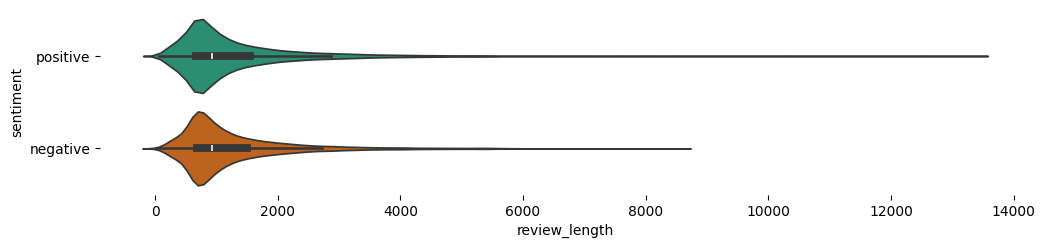

In [17]:
#Plot the distribution of reviews length with respect to the sentiment label using violin plots
figsize = (12, 1.2 * len(imdb_db['sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(imdb_db, x='review_length', y='sentiment', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Reviews Word Clouds

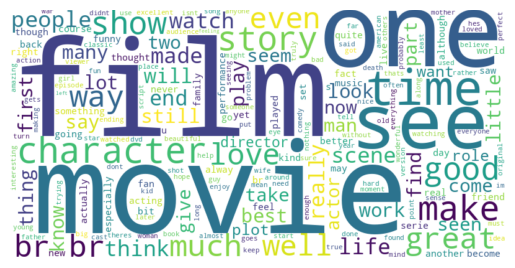

In [18]:
#Word Cloud for positive review

#Join all positive reviews into a single string
positive_reviews = imdb_db[imdb_db['sentiment'] == 'positive']['review']
positive_reviews = " ".join(positive_reviews)

#Generate word cloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.show()

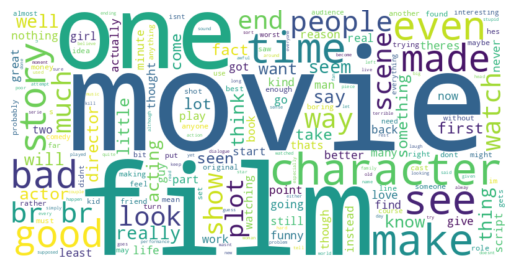

In [19]:
#Word Cloud for negative review

#Join all negative reviews into a single string
negative_reviews = imdb_db[imdb_db['sentiment'] == 'negative']['review']
negative_reviews = " ".join(negative_reviews)

#Generate word cloud
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(negative_reviews)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.show()

# Exporting Cleaned Data for Modeling

In [22]:
#Export cleaned imdb_db as csv file to a specific location in Google Drive
file_path = '/content/gdrive/MyDrive/Document/Data Science/Skills Development/fellowshipai/imdb-cleaned.csv'
imdb_db.to_csv(file_path, index=False)